# Task3

## How to pre-process data
- Important information:
    - name of the amminoacid
    - position of the amminoacid
- List of all amminoacids names -> encoding; keep the position

## Which model
- sklearn: DecisionTreeClassifier

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score #best value at 1
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
## Read training data, labels, test data
train_data = pd.read_csv('dataset/train.csv', delimiter=',')
test_data = pd.read_csv('dataset/test.csv', delimiter=',')
train_data

,Sequence,Active
0,DKWL,0
1,FCHN,0
2,KDQP,0
3,FNWI,0
4,NKRM,0
...,...,...
111995,GSME,0
111996,DLPT,0
111997,SGHC,0
111998,KIGT,0


In [3]:
#Encode amminoacid names
amminoacids = []
for string in train_data["Sequence"]:
    for char in string:
        if char not in amminoacids:
            amminoacids.append(char)
amminoacids.sort()
amminoacids_number = [i for i in range(1,len(amminoacids)+1)]
amminoacids_dict = dict(zip(amminoacids,amminoacids_number))
amminoacids_dict

{'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [4]:
#Prepare the training dataset:
#encode
#normalise
train_encoded = []
for string in train_data["Sequence"]:
    row = []
    for i,char in enumerate(string):
        row.append(amminoacids_dict[char])
    train_encoded.append(row)
train_encoded = [(np.array(item)/len(amminoacids)).tolist() for item in train_encoded]
train_encoded

[[0.15, 0.45, 0.95, 0.5],
 [0.25, 0.1, 0.35, 0.6],
 [0.45, 0.15, 0.7, 0.65],
 [0.25, 0.6, 0.95, 0.4],
 [0.6, 0.45, 0.75, 0.55],
 [0.4, 0.95, 0.35, 0.05],
 [0.3, 0.2, 0.25, 0.9],
 [0.45, 0.05, 0.75, 0.8],
 [0.4, 0.55, 0.3, 0.95],
 [0.45, 1.0, 0.75, 0.45],
 [0.25, 0.6, 0.65, 0.75],
 [0.9, 0.05, 0.8, 0.35],
 [0.75, 0.9, 0.05, 0.9],
 [0.2, 0.55, 0.05, 0.45],
 [0.7, 0.45, 0.7, 0.75],
 [0.5, 0.1, 0.9, 0.3],
 [0.25, 0.7, 0.8, 0.85],
 [0.55, 0.35, 0.75, 0.4],
 [0.55, 0.55, 0.3, 0.95],
 [0.05, 0.9, 0.05, 0.5],
 [0.55, 0.05, 0.25, 0.15],
 [0.55, 0.15, 0.75, 0.5],
 [0.6, 0.15, 0.75, 1.0],
 [1.0, 0.1, 1.0, 0.55],
 [0.6, 0.3, 0.2, 0.7],
 [1.0, 0.85, 0.95, 0.05],
 [0.9, 0.2, 0.5, 0.6],
 [0.35, 0.45, 0.75, 0.05],
 [0.65, 0.95, 0.9, 0.35],
 [0.4, 0.75, 0.35, 0.75],
 [0.2, 0.35, 0.15, 0.9],
 [0.05, 0.3, 0.65, 0.95],
 [0.9, 0.35, 0.05, 0.45],
 [0.5, 0.35, 1.0, 0.5],
 [0.2, 0.75, 1.0, 0.65],
 [0.7, 0.8, 0.95, 0.25],
 [0.7, 0.95, 0.1, 0.55],
 [0.45, 0.1, 0.2, 0.15],
 [0.85, 0.65, 0.35, 0.15],
 [0.75, 1.0,

In [5]:
train_labels = train_data["Active"].tolist()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded,train_labels, train_size=0.8)

## Sklearn Classifiers options

In [12]:
classifier = DecisionTreeClassifier(random_state=0,class_weight = "balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("score ", f1_score(y_test, y_pred))

score  0.7404718693284936


## Keras

In [72]:
## NN 
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=(4,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))



In [73]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)


In [74]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=64)

Epoch 1/50
1400/1400 [==============================] - 1s 800us/step - loss: 0.3468 - accuracy: 0.0363 - val_loss: 0.1635 - val_accuracy: 0.0388
Epoch 2/50
1400/1400 [==============================] - 1s 524us/step - loss: 0.1615 - accuracy: 0.0384 - val_loss: 0.1614 - val_accuracy: 0.0388
Epoch 3/50
1400/1400 [==============================] - 1s 530us/step - loss: 0.1550 - accuracy: 0.0374 - val_loss: 0.1554 - val_accuracy: 0.0388
Epoch 4/50
1400/1400 [==============================] - 1s 526us/step - loss: 0.1527 - accuracy: 0.0383 - val_loss: 0.1507 - val_accuracy: 0.0388
Epoch 5/50
1400/1400 [==============================] - 1s 527us/step - loss: 0.1457 - accuracy: 0.0375 - val_loss: 0.1481 - val_accuracy: 0.0388
Epoch 6/50
1400/1400 [==============================] - 1s 524us/step - loss: 0.1423 - accuracy: 0.0370 - val_loss: 0.1474 - val_accuracy: 0.0388
Epoch 7/50
1400/1400 [==============================] - 1s 561us/step - loss: 0.1424 - accuracy: 0.0373 - val_loss: 0.1472 -

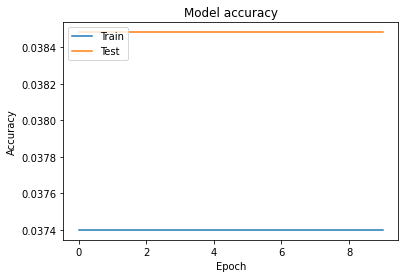

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
y_pred = model.predict(X_test)

In [77]:

f1_score(y_test, y_pred)

0.07477438762354964